## ECGR 4105 - HomeWork 4, Problem # 1

## Problem # 1
Problem # 1 uses "Cancer" dataset (from the Sklearn) to build a SVM Classifier Model to classify the type of Cancer (Malignant Vs. Benign). The PCA feature extraction will be used for training. N number of independent trainings (N = 1, .... , K) will be performed. The optimum number of K, principal components that achieve the highest classification accuracy will be identified and the classification accuracy, precision and recall over a different number of Ks will be plotted.

Next, differnt kernel trick will be explored to capture non-linearities within the data. The results will be plotted and the accuracies for different kernels will be compared.

In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Importing necessary Libraries for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import precision_recall_curve

# Importing Necessary libraries and Cancer Dataset from sklearn 
from sklearn.datasets import load_breast_cancer

In [3]:
breast = load_breast_cancer()

In [4]:
breast_data = breast.data
labels = np.reshape(breast.target, (breast_data.shape[0],1))
df = pd.DataFrame(np.concatenate([breast_data, labels], axis = 1))
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [5]:
# Importing Necessary Library for PCA Feature Extraction
from sklearn.decomposition import PCA

In [6]:
N = breast_data.shape[1]
X = df.values[:, :N]
Y = df.values[:, N]

In [7]:
# MinMax and Standard Scaling as part of Data Preprocessing
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X)

Standard_Scaling = StandardScaler()
X = Standard_Scaling.fit_transform(X)

In [51]:
pca = PCA()
principalComponents = pca.fit_transform(X)

In [52]:
# Splitting the Data into Training and Validation(Test) set
X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [10]:
# Initializes evaluation metrics for logistic regression model PCA
k = principalComponents.shape[1]
accuracy = np.zeros(k)
precision = np.zeros(k)
recall = np.zeros(k)

In [11]:
from sklearn.svm import SVC

In [12]:
# Iterative Training and Evaluation of the Model
acc = 0
K_opt = 0
for i in range(k):
    
    # SVC Regression
    SVCReg = SVC()
    SVCReg.fit(X_train[:, :i + 1], Y_train)
    Y_Pred = SVCReg.predict(X_test[:, :i + 1])

    # Evaluation of the Model for Accuracy, Precision, and Recall
    accuracy[i] = metrics.accuracy_score(Y_test, Y_Pred)
    precision[i] = metrics.precision_score(Y_test, Y_Pred)
    recall[i] = metrics.recall_score(Y_test, Y_Pred)

    if accuracy[i] > acc:
        acc = accuracy[i]
        k_opt = i + 1

In [13]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', acc)
print('Precision:', precision[k_opt - 1])
print('Recall:', recall[k_opt - 1])

Optimal value of K: 8
Accuracy: 0.9824561403508771
Precision: 0.9850746268656716
Recall: 0.9850746268656716


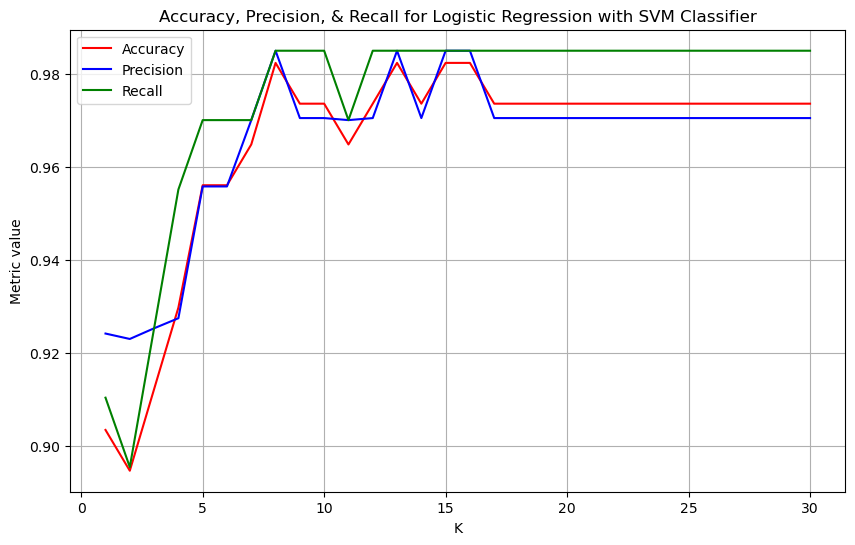

In [49]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), accuracy, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), precision, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), recall, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, Precision, & Recall for Logistic Regression with SVM Classifier')
plt.legend();

In [15]:
Accuracy_Lin = np.zeros(k)
Precision_Lin = np.zeros(k)
Recall_Lin = np.zeros(k)

In [16]:
Acc = 0

for i in range(k):
    
    
    # SVM Model with Linear Kernal
    model_lin = SVC(kernel = "linear", C = 1e2)
    model_lin.fit(X_train[:, :i + 1], Y_train)
    Y_Pred_lin = model_lin.predict(X_test[:, :i + 1])
    
    Accuracy_Lin[i] = metrics.accuracy_score(Y_test, Y_Pred_lin)
    Precision_Lin[i] = metrics.precision_score(Y_test, Y_Pred_lin)
    Recall_Lin[i] = metrics.recall_score(Y_test, Y_Pred_lin)
    
    if Accuracy_Lin[i] > Acc:
        Acc = Accuracy_Lin[i]
        k_opt = i + 1

In [17]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', Acc)
print('Precision:', Precision_Lin[k_opt - 1])
print('Recall:', Recall_Lin[k_opt - 1])

Optimal value of K: 8
Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716


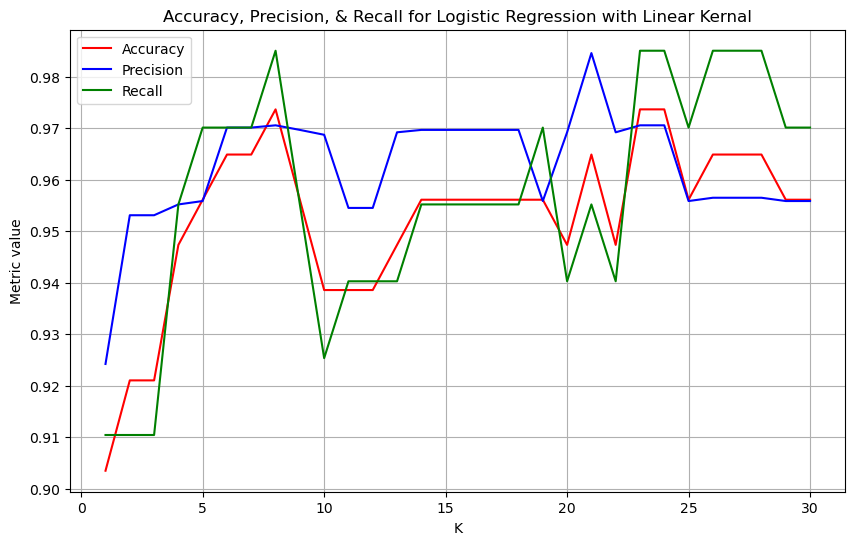

In [18]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), Accuracy_Lin, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), Precision_Lin, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), Recall_Lin, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, Precision, & Recall for Logistic Regression with Linear Kernal')
plt.legend();

In [19]:
Accuracy_Poly = np.zeros(k)
Precision_Poly = np.zeros(k)
Recall_Poly = np.zeros(k)

In [35]:
Acc = 0

for i in range(k):
    
    
    # SVM Model with Poly Kernal
    model_poly = SVC(kernel = "poly", C = 1e2, degree = 5)
    model_poly.fit(X_train[:, :i + 1], Y_train)
    Y_Pred_poly = model_poly.predict(X_test[:, :i + 1])
    
    Accuracy_Poly[i] = metrics.accuracy_score(Y_test, Y_Pred_poly)
    Precision_Poly[i] = metrics.precision_score(Y_test, Y_Pred_poly)
    Recall_Poly[i] = metrics.recall_score(Y_test, Y_Pred_poly)
    
    if Accuracy_Poly[i] > Acc:
        Acc = Accuracy_Poly[i]
        k_opt = i + 1

In [36]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', Acc)
print('Precision:', Precision_Poly[k_opt - 1])
print('Recall:', Recall_Poly[k_opt - 1])

Optimal value of K: 5
Accuracy: 0.956140350877193
Precision: 0.9305555555555556
Recall: 1.0


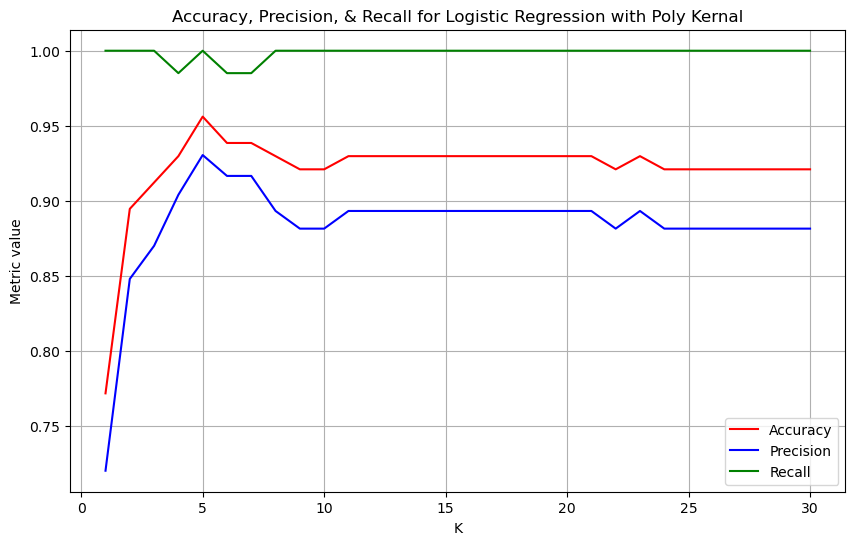

In [37]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), Accuracy_Poly, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), Precision_Poly, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), Recall_Poly, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, Precision, & Recall for Logistic Regression with Poly Kernal')
plt.legend();

In [23]:
Accuracy_RBF = np.zeros(k)
Precision_RBF = np.zeros(k)
Recall_RBF = np.zeros(k)

In [46]:
Acc = 0

for i in range(k):
    
    
    # SVM Model with Poly Kernal
    model_rbf = SVC(kernel = "rbf", C = 1e2, gamma = 0.01)
    model_rbf.fit(X_train[:, :i + 1], Y_train)
    Y_Pred_rbf = model_rbf.predict(X_test[:, :i + 1])
    
    Accuracy_RBF[i] = metrics.accuracy_score(Y_test, Y_Pred_rbf)
    Precision_RBF[i] = metrics.precision_score(Y_test, Y_Pred_rbf)
    Recall_RBF[i] = metrics.recall_score(Y_test, Y_Pred_rbf)
    
    if Accuracy_RBF[i] > Acc:
        Acc = Accuracy_RBF[i]
        k_opt = i + 1

In [47]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', Acc)
print('Precision:', Precision_RBF[k_opt - 1])
print('Recall:', Recall_RBF[k_opt - 1])

Optimal value of K: 10
Accuracy: 0.9912280701754386
Precision: 0.9852941176470589
Recall: 1.0


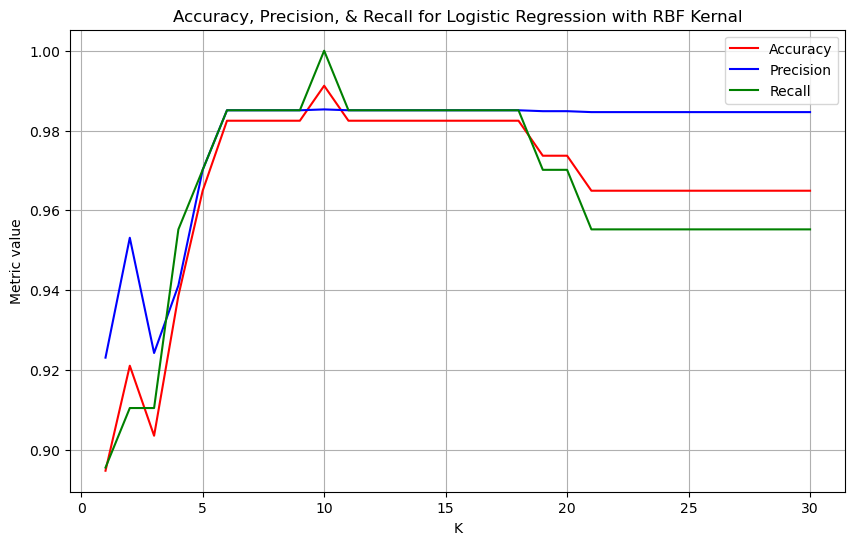

In [48]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), Accuracy_RBF, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), Precision_RBF, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), Recall_RBF, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, Precision, & Recall for Logistic Regression with RBF Kernal')
plt.legend();